In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("Personality.csv")

In [3]:
df.head()

,movie_preferences,social_media_activity,reading_habits,favorite_leisure_activities,music_taste,fashion_style,travel_preferences,personality_behaviour
0,Science Fiction,Fashion,Short Stories,Gaming,EDM,Casual,Road Trips,Complex
1,Mystery,Fashion,Novels,Sports,Classical,Sporty,Family Holidays,Complex
2,Mystery,Food,Comics,Sports,Jazz,Classic,Solo Travel,Complex
3,Comedy,Lifestyle,Short Stories,Drawing,Classical,Casual,Adventure,Versatile
4,Mystery,Lifestyle,Short Stories,Gaming,Classical,Vintage,Solo Travel,Complex


In [4]:
X = df[['movie_preferences', 'social_media_activity', 'reading_habits', 'favorite_leisure_activities', 'music_taste', 'fashion_style', 'travel_preferences']]
y = df['personality_behaviour']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=100)

In [6]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [7]:
y_pred = knn.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.694


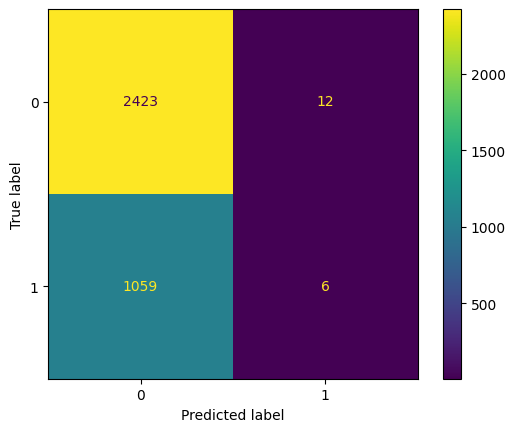

In [9]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Complex       0.70      1.00      0.82      2435
   Versatile       0.33      0.01      0.01      1065

    accuracy                           0.69      3500
   macro avg       0.51      0.50      0.42      3500
weighted avg       0.59      0.69      0.57      3500



In [11]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[2423   12]
 [1059    6]]
Accuracy :  0.694
Sensitivity :  0.9950718685831622
Specificity :  0.005633802816901409


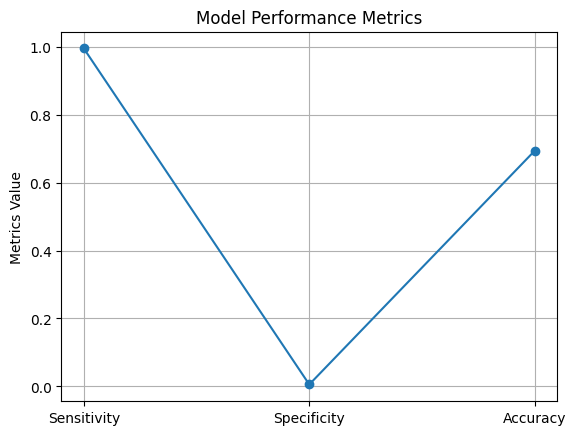

In [12]:
plt.plot(['Sensitivity', 'Specificity', 'Accuracy'], [sensitivity1, specificity1, accuracy], marker='o')

# Adding labels and title
plt.title('Model Performance Metrics')
plt.ylabel('Metrics Value')

# Display the plot
plt.grid(True)
plt.show()

In [14]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label="Complex")
precision = precision_score(y_test, y_pred, pos_label="Complex")
recall = recall_score(y_test, y_pred, pos_label="Complex")

print("Accuracy:", accuracy)
print("F1-Score:", f1score)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.694
F1-Score: 0.8189961128950481
Precision: 0.69586444572085
Recall: 0.9950718685831622
